In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Telco_Cusomer_Churn.csv to Telco_Cusomer_Churn.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Telco_Cusomer_Churn.csv')
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.info()
df.describe(include='all')
for col in df.columns:
    print(f"\n--- C·ªôt: {col} ---")
    print(df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
pd.DataFrame({'Missing Values': missing, 'Percent %': missing_percent})

Missing Values  Percent %
customerID                     0        0.0
gender                         0        0.0
SeniorCitizen                  0        0.0
Partner                        0        0.0
Dependents                     0        0.0
tenure                         0        0.0
PhoneService                   0        0.0
MultipleLines                  0        0.0
InternetService                0        0.0
OnlineSecurity                 0        0.0
OnlineBackup                   0        0.0
DeviceProtection               0        0.0
TechSupport                    0        0.0
StreamingTV                    0        0.0
StreamingMovies                0        0.0
Contract                       0        0.0
PaperlessBilling               0        0.0
PaymentMethod                  0        0.0
MonthlyCharges                 0        0.0
TotalCharges                   0        0.0
Churn                          0        0.0

**1. D·ª∞ B√ÅO CHURN ƒê·ªÇ CH·ª¶ ƒê·ªòNG GI·ªÆ CH√ÇN ( ch·∫°y sau khi ch·∫°y ph·∫ßn Dashboard)**

*Label*

In [ ]:
import pandas as pd


# 1. Chuy·ªÉn bi·∫øn s·ªë sang float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # convert, l·ªói -> NaN
df['TotalCharges'].fillna(0, inplace=True)

# 2. X·ª≠ l√Ω c√°c bi·∫øn categorical
# Bi·∫øn nh·ªã ph√¢n c√≥ th·ªÉ map Yes/No -> 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0, 'Female':0, 'Male':1})

# 3. C√°c bi·∫øn c√≥ nhi·ªÅu gi√° tr·ªã: One-hot encoding
multi_value_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# N·∫øu mu·ªën, tr∆∞·ªõc h·∫øt x·ª≠ l√Ω gi√° tr·ªã ƒë·∫∑c bi·ªát 'No internet service' ho·∫∑c 'No phone service' -> 'No'
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service':'No', 'No phone service':'No'})

# One-hot encoding
df = pd.get_dummies(df, columns=multi_value_cols, drop_first=True)  # drop_first ƒë·ªÉ tr√°nh dummy trap

# K·∫øt qu·∫£: t·∫•t c·∫£ bi·∫øn s·ªë ƒë√£ l√† float, categorical nhi·ªÅu gi√° tr·ªã ƒë√£ one-hot
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0              True                 False            False            Fal

/tmp/ipython-input-2357697731.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Chuy·ªÉn True/False -> 1/0
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)


*X·ª≠ l√Ω Scale*

In [ ]:
from sklearn.preprocessing import StandardScaler

# C√°c c·ªôt numeric c·∫ßn scale
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Kh·ªüi t·∫°o scaler
scaler = StandardScaler()

# Scale d·ªØ li·ªáu
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Ki·ªÉm tra k·∫øt qu·∫£
print(df[numeric_cols].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874


*Threshold*

ROC AUC: 0.82328140742463


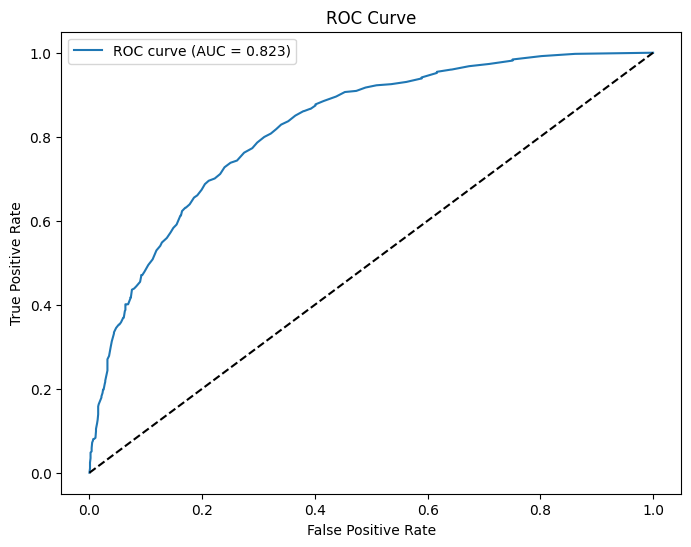

Best Threshold = 0.25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Gi·∫£ s·ª≠ df l√† dataframe ƒë√£ x·ª≠ l√Ω, scale xong
X1 = df.drop(['customerID','Churn'], axis=1)
y1 = df['Churn']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Fit Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# D·ª± ƒëo√°n x√°c su·∫•t cho l·ªõp 1
y_probs = model.predict_proba(X_test)[:, 1]

# T√≠nh FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# T√≠nh AUC
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", auc)

# V·∫Ω ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Ch·ªçn threshold t·ªëi ∆∞u (Youden's J)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print("Best Threshold =", best_thresh)


*SMOTE - df2*

In [ ]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
# 0Ô∏è‚É£ Import th∆∞ vi·ªán
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt

# 1Ô∏è‚É£ T·∫°o b·∫£n copy df2
df2 = df.copy()

# 2Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu t·ª´ df2
X = df2.drop(['customerID','Churn'], axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3Ô∏è‚É£ SMOTEENN c√¢n b·∫±ng d·ªØ li·ªáu train
smote = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4Ô∏è‚É£ Chu·∫©n b·ªã c√°c model
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# 5Ô∏è‚É£ H√†m t√≠nh threshold t·ªëi ∆∞u v√† metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict v·ªõi threshold t·ªëi ∆∞u
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 6Ô∏è‚É£ Ch·∫°y t·∫•t c·∫£ model v√† l∆∞u k·∫øt qu·∫£
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train_bal, y_train_bal, X_test, y_test)

# 7Ô∏è‚É£ Hi·ªÉn th·ªã k·∫øt qu·∫£
results_df = pd.DataFrame(results).T
print(results_df)


Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:32:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 2243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5256, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573250 -> initscore=0.295122
[LightGBM] [Info] Start training from score 0.295122
Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.936836   0.525140  0.754011  0.619100  0.819008
Decision Tree        1.000000   0.482982  0.796791  0.601413  0.744289
Random Forest        0.520000   0.502408  0.836898  0.627884  0.830249
XGBoost              0.544260   0.492754  0.818182  0.615075  0.

SMOTE-ADASYN - df3

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
df3=df.copy()
# 2Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu
X = df3.drop(['customerID','Churn'], axis=1)
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3Ô∏è‚É£ SMOTE + ADASYN c√¢n b·∫±ng d·ªØ li·ªáu train
smote = SMOTEENN(random_state=42)  # SMOTEENN k·∫øt h·ª£p oversample + clean noise
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train_res, y_train_res)

# 4Ô∏è‚É£ Chu·∫©n b·ªã c√°c model
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# 5Ô∏è‚É£ H√†m t√≠nh threshold t·ªëi ∆∞u v√† metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict v·ªõi threshold t·ªëi ∆∞u
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 6Ô∏è‚É£ Ch·∫°y t·∫•t c·∫£ model v√† l∆∞u k·∫øt qu·∫£
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train_bal, y_train_bal, X_test, y_test)

# 7Ô∏è‚É£ Hi·ªÉn th·ªã k·∫øt qu·∫£
results_df = pd.DataFrame(results).T
print(results_df)

Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:03:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 3078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 6091, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494664 -> initscore=-0.021344
[LightGBM] [Info] Start training from score -0.021344
Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.811625   0.523191  0.754011  0.617744  0.818985
Decision Tree        1.000000   0.477124  0.780749  0.592292  0.735785
Random Forest        0.520000   0.526132  0.807487  0.637131  0.831606
XGBoost              0.528394   0.511036  

*CLASS WEIGHT - df4*

In [ ]:
# 0Ô∏è‚É£ Import th∆∞ vi·ªán
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt

# 1Ô∏è‚É£ T·∫°o b·∫£n copy df4
df4 = df.copy()

# 2Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu
X = df4.drop(['customerID','Churn'], axis=1)
y = df4['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3Ô∏è‚É£ Chu·∫©n b·ªã c√°c model v·ªõi class_weight
models = {
    'Naive Bayes': GaussianNB(),  # kh√¥ng h·ªó tr·ª£ class_weight
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), random_state=42),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, (y_train==0).sum()/(y_train==1).sum()], verbose=0, random_state=42)
}

# 4Ô∏è‚É£ H√†m t√≠nh threshold t·ªëi ∆∞u v√† metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict v·ªõi threshold t·ªëi ∆∞u
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 5Ô∏è‚É£ Ch·∫°y t·∫•t c·∫£ model v√† l∆∞u k·∫øt qu·∫£
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# 6Ô∏è‚É£ Hi·ªÉn th·ªã k·∫øt qu·∫£
results_df = pd.DataFrame(results).T
print(results_df)


Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:04:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.682571   0.537402  0.729947  0.619048  0.823470
Decision Tree        1.000000   0.493113  0.478610  0.485753  0.650164
Random Forest        0.296486   0.531429  0.745989  0.620690  0.825608
XGBoost              0.433964   0.536346  0.729947  0.618347  0.821065
LightGBM             0.426558   0.515464  0.802139  0.627615  0.832105
CatBoost             0.394294   0.500805  0.831551  0.625126  0.839431


*HYPERPARAMETERS - SMOTEENN df5*

In [ ]:
# 0Ô∏è‚É£ Import th∆∞ vi·ªán
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# 1Ô∏è‚É£ T·∫°o df5
df5 = df.copy()

# 2Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu
X = df5.drop(['customerID','Churn'], axis=1)
y = df5['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3Ô∏è‚É£ SMOTEENN c√¢n b·∫±ng d·ªØ li·ªáu
smote = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4Ô∏è‚É£ Chu·∫©n b·ªã model v√† hyperparameters
models_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3,5,7,10,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,5],
            'criterion': ['gini','entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [5,7,10,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,4],
            'criterion': ['gini','entropy']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [3,5,7],
            'learning_rate': [0.01,0.05,0.1],
            'subsample': [0.7,0.8,1],
            'colsample_bytree':[0.7,0.8,1]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [3,5,7,-1],
            'learning_rate':[0.01,0.05,0.1],
            'num_leaves':[20,31,50],
            'subsample':[0.7,0.8,1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0, random_state=42),
        'params': {
            'iterations':[200,400,600],
            'depth':[3,5,7],
            'learning_rate':[0.01,0.05,0.1],
            'l2_leaf_reg':[1,3,5]
        }
    }
}

# 5Ô∏è‚É£ H√†m t√¨m hyperparameters t·ªët nh·∫•t
def tune_model(model, params, X_train, y_train):
    search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=10,
        scoring='f1',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# 6Ô∏è‚É£ Ch·∫°y tuning cho t·∫•t c·∫£ model
best_models = {}
for name, mp in models_params.items():
    print(f"Tuning {name}...")
    best_model, best_params = tune_model(mp['model'], mp['params'], X_train_bal, y_train_bal)
    best_models[name] = best_model
    print(f"Best params for {name}: {best_params}\n")

# 7Ô∏è‚É£ T√≠nh threshold t·ªëi ∆∞u v√† metrics nh∆∞ tr∆∞·ªõc
def evaluate_model(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    y_pred = (y_probs >= best_thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    return {'Best Threshold':best_thresh, 'Precision':precision, 'Recall':recall, 'F1':f1, 'ROC-AUC':auc}

results = {}
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_test, y_test)

results_df = pd.DataFrame(results).T
print(results_df)


Tuning Decision Tree...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}

Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}

Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1}

Tuning LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 2243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5256, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573250 -> initscore=0.295122
[LightGBM] [Info] Start training from score 0.295122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

K·∫æT LU·∫¨N
∆Øu ti√™n b·∫Øt ƒë∆∞·ª£c nhi·ªÅu churn -- > ch·ªçn catboost c·ªßa class weight

Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:33:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.682571   0.537402  0.729947  0.619048  0.823470
Decision Tree        1.000000   0.493113  0.478610  0.485753  0.650164
Random Forest        0.296486   0.531429  0.745989  0.620690  0.825608
XGBoost              0.433964   0.536346  0.729947  0.618347  0.821065
LightGBM             0.426558   0.515464  0.802139  0.627615  0.832105
CatBoost             0.394294   0.500805  0.831551  0.625126  0.839431


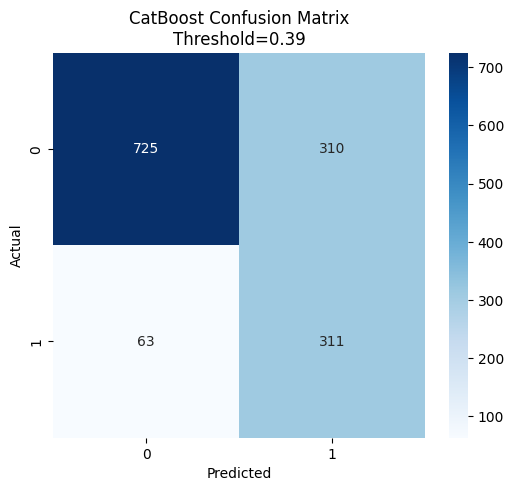

In [ ]:
# 0Ô∏è‚É£ Import th∆∞ vi·ªán
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# 1Ô∏è‚É£ T·∫°o b·∫£n copy df_new
df_new = df.copy()  # Ho·∫∑c df_new = df_new n·∫øu b·∫°n ƒë√£ c√≥ df_new
df_new = df_new.copy()  # ƒë·∫£m b·∫£o l√† copy ƒë·ªôc l·∫≠p

# 2Ô∏è‚É£ Chu·∫©n b·ªã d·ªØ li·ªáu
X = df_new.drop(['customerID','Churn'], axis=1)
y = df_new['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3Ô∏è‚É£ Chu·∫©n b·ªã c√°c model v·ªõi class_weight
models = {
    'Naive Bayes': GaussianNB(),  # kh√¥ng h·ªó tr·ª£ class_weight
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                 scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), random_state=42),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, (y_train==0).sum()/(y_train==1).sum()],
                                   verbose=0, random_state=42)
}

# 4Ô∏è‚É£ H√†m t√≠nh threshold t·ªëi ∆∞u v√† metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve ƒë·ªÉ t√¨m threshold t·ªëi ∆∞u
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict v·ªõi threshold t·ªëi ∆∞u
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 5Ô∏è‚É£ Ch·∫°y t·∫•t c·∫£ model v√† l∆∞u k·∫øt qu·∫£
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# 6Ô∏è‚É£ Hi·ªÉn th·ªã k·∫øt qu·∫£
results_df = pd.DataFrame(results).T
print(results_df)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve
cat_model = models['CatBoost']
# Gi·∫£ s·ª≠ model CatBoost l√† 'cat_model'
cat_model.fit(X_train, y_train)

# D·ª± ƒëo√°n x√°c su·∫•t
y_probs = cat_model.predict_proba(X_test)[:, 1]

# T√¨m threshold t·ªëi ∆∞u theo Youden's J
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

# Predict v·ªõi threshold t·ªëi ∆∞u
y_pred = (y_probs >= best_thresh).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# V·∫Ω heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'CatBoost Confusion Matrix\nThreshold={best_thresh:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**True Negative (TN) = 725**

S·ªë kh√°ch h√†ng kh√¥ng churn (0) ƒë∆∞·ª£c d·ª± ƒëo√°n ƒë√∫ng l√† kh√¥ng churn.

ƒê√¢y l√† k·∫øt qu·∫£ ƒë√∫ng v·ªõi l·ªõp "0".

**False Positive (FP) = 310**

S·ªë kh√°ch h√†ng kh√¥ng churn (0) nh∆∞ng model d·ª± ƒëo√°n l√† churn (1).

ƒê√¢y l√† l·ªói d·ª± ƒëo√°n churn qu√° m·ª©c, g√¢y c·∫£nh b√°o sai.

False Negative (FN) = 63 **bold text**

S·ªë kh√°ch h√†ng churn (1) nh∆∞ng model d·ª± ƒëo√°n l√† kh√¥ng churn (0).

ƒê√¢y l√† l·ªói b·ªè s√≥t churn, nguy hi·ªÉm v√¨ kh√°ch h√†ng th·ª±c s·ª± churn nh∆∞ng b·∫°n kh√¥ng nh·∫≠n ra.

**True Positive (TP) = 311**

S·ªë kh√°ch h√†ng churn (1) ƒë∆∞·ª£c d·ª± ƒëo√°n ƒë√∫ng l√† churn.

ƒê√¢y l√† k·∫øt qu·∫£ ƒë√∫ng v·ªõi l·ªõp "1".

***CatBoost n√†y ∆∞u ti√™n b·∫Øt churn h∆°n l√† d·ª± ƒëo√°n ch√≠nh x√°c tuy·ªát ƒë·ªëi, ph√π h·ª£p v·ªõi chi·∫øn l∆∞·ª£c gi·ªØ kh√°ch h√†ng quan tr·ªçng.***

**2. DASHBOARD R·ª¶I RO KH√ÅCH H√ÄNG**

In [ ]:
import plotly.express as px

# ƒê·∫øm s·ªë l∆∞·ª£ng churn t·ªïng th·ªÉ
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# V·∫Ω donut chart
fig = px.pie(
    churn_counts,
    names='Churn',
    values='Count',
    hole=0.4,  # t·∫°o donut
    color='Churn',
    color_discrete_map={'Yes':'5D2F77', 'No':'F5D2D2'},  # ƒë·ªè cho churn, xanh cho kh√¥ng churn
    title='T·ªïng quan t·ª∑ l·ªá kh√°ch h√†ng Churn vs Kh√¥ng Churn'
)

fig.update_traces(
    textinfo='percent+label',  # hi·ªÉn th·ªã % + nh√£n
    textfont_size=14
)
fig.update_layout(
    title={
    'text': 'T·ªïng quan t·ª∑ l·ªá kh√°ch h√†ng Churn vs Kh√¥ng Churn',
    'x': 0.5,  # cƒÉn gi·ªØa ti√™u ƒë·ªÅ
    'xanchor': 'center',
    'yanchor': 'top'
    },
    showlegend=False,
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=18, showarrow=False)]
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# üß© Chu·∫©n b·ªã d·ªØ li·ªáu
df['SeniorCitizen_cat'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

df_melt = df.melt(
    id_vars='Churn',
    value_vars=['gender', 'SeniorCitizen_cat', 'Partner', 'Dependents'],
    var_name='Feature',
    value_name='Category'
)

# üé® T√πy ch·ªânh nh√£n v√† m√†u ri√™ng cho t·ª´ng feature
feature_label_map = {
    'gender': {'Male': 'Male', 'Female': 'Female'},
    'Partner': {'Yes': 'Have Partner', 'No': 'No Partner'},
    'Dependents': {'Yes': 'Have Dependent', 'No': 'No Dependent'},
    'SeniorCitizen_cat': {'Yes': 'Senior Citizen', 'No': 'Not Senior Citizen'}
}

# üåà M√†u pastel m·ªõi
feature_color_map = {
    'gender': {'Male': '#BDE3C3', 'Female': '#F8F7BA'},
    'Partner': {'Have Partner': '#BDE3C3', 'No Partner': '#F8F7BA'},
    'Dependents': {'Have Dependent': '#BDE3C3', 'No Dependent': '#F8F7BA'},
    'SeniorCitizen_cat': {'Senior Citizen': '#BDE3C3', 'Not Senior Citizen': '#F8F7BA'}
}

# Danh s√°ch feature
features = df_melt['Feature'].unique()
fig = go.Figure()

# üßÆ T√≠nh t·ª∑ l·ªá churn (%) cho t·ª´ng Category
for i, feature in enumerate(features):
    df_temp = df_melt[df_melt['Feature'] == feature].copy()
    df_temp['Category'] = df_temp['Category'].map(feature_label_map[feature])

    # ƒê·∫øm churn v√† t·ªïng
    counts = df_temp.groupby(['Category', 'Churn']).size().unstack(fill_value=0)
    counts['Total'] = counts.sum(axis=1)
    counts['Churn_rate'] = counts['Yes'] / counts['Total'] * 100
    counts = counts.reset_index()

    categories = counts['Category'].unique()
    colors = feature_color_map[feature]

    for cat in categories:
        subset = counts[counts['Category'] == cat]
        fig.add_bar(
            x=[cat],
            y=subset['Churn_rate'],
            name=cat,
            marker_color=colors[cat],
            visible=(i == 0)
        )

# S·ªë trace m·ªói feature
n_cat = len(counts['Category'].unique())

# ü™Ñ Dropdown menu b·∫≠t/t·∫Øt trace ƒë√∫ng feature
buttons = []
for i, feature in enumerate(features):
    visible = [False] * (len(features) * n_cat)
    start = i * n_cat
    end = start + n_cat
    for j in range(start, end):
        visible[j] = True
    buttons.append(dict(
        label=feature,
        method='update',
        args=[{'visible': visible},
              {'title': f'T·ª∑ l·ªá kh√°ch h√†ng r·ªùi b·ªè (%) theo {feature}'}]
    ))

# ‚ú® Layout t·ªïng th·ªÉ
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction='down',
        x=1.25,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    barmode='group',
    legend_title_text='Ph√¢n lo·∫°i kh√°ch h√†ng',
    title=f'T·ª∑ l·ªá kh√°ch h√†ng r·ªùi b·ªè (%) theo {features[0]}',
    xaxis_title='Nh√≥m kh√°ch h√†ng',
    yaxis_title='T·ª∑ l·ªá r·ªùi b·ªè (%)',
    plot_bgcolor='white',
    font=dict(family='Inter, sans-serif', size=14, color='#2E2E2E')
)

fig.show()


In [ ]:
import pandas as pd

# Gi·∫£ s·ª≠ df l√† d·ªØ li·ªáu c·ªßa b·∫°n

# Pivot table: s·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn:")
print(pivot_table_count)

# N·∫øu mu·ªën % churn theo Contract
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100
print("\nT·ª∑ l·ªá ph·∫ßn trƒÉm kh√°ch h√†ng theo Contract v√† Churn (%):")
print(pivot_table_percent)

# Pivot nhi·ªÅu c·∫•p: Contract + PaperlessBilling
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract','PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("\nS·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract + PaperlessBilling v√† Churn:")
print(pivot_table_multi)



S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

T·ª∑ l·ªá ph·∫ßn trƒÉm kh√°ch h√†ng theo Contract v√† Churn (%):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract + PaperlessBilling v√† Churn:
Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                682   118
Two year       No                 895    15
               Yes                752    33


In [ ]:
import pandas as pd

# --- Pivot table: S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn ---
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("üìä S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn:")
display(
    pivot_table_count
    .style
    .background_gradient(cmap='Blues')  # M√†u xanh d∆∞∆°ng nh·∫π
    .set_caption("S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn")
    .format("{:,.0f}")  # Kh√¥ng c√≥ ph·∫ßn th·∫≠p ph√¢n
)

# --- % churn theo Contract ---
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100

print("\nüìà T·ª∑ l·ªá ph·∫ßn trƒÉm kh√°ch h√†ng theo Contract v√† Churn (%):")
display(
    pivot_table_percent
    .style
    .background_gradient(cmap='YlOrRd')  # V√†ng ‚Üí cam ‚Üí ƒë·ªè
    .set_caption("T·ª∑ l·ªá ph·∫ßn trƒÉm kh√°ch h√†ng theo Contract v√† Churn")
    .format("{:.1f}%")  # Hi·ªÉn th·ªã 1 ch·ªØ s·ªë sau d·∫•u ph·∫©y
)

# --- Pivot nhi·ªÅu c·∫•p: Contract + PaperlessBilling ---
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract', 'PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("\nüß© S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract + PaperlessBilling v√† Churn:")
display(
    pivot_table_multi
    .style
    .background_gradient(cmap='PuBuGn')  # Xanh t√≠m nh·∫π
    .set_caption("S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract + PaperlessBilling v√† Churn")
    .format("{:,.0f}")
)


üìä S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn:



üìà T·ª∑ l·ªá ph·∫ßn trƒÉm kh√°ch h√†ng theo Contract v√† Churn (%):



üß© S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract + PaperlessBilling v√† Churn:


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# --- Pivot 1: S·ªë l∆∞·ª£ng kh√°ch h√†ng theo Contract v√† Churn ---
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

# --- % churn theo Contract ---
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100

# --- Pivot nhi·ªÅu c·∫•p: Contract + PaperlessBilling ---
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract', 'PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

#  Gradient pastel: nh·∫•n m·∫°nh khi gi√° tr·ªã cao
def pastel_gradient(values, low='#E5F4E7', high='#A8D8B9'):
    vals = np.array(values, dtype=float)
    norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
    colors = []
    for v in norm:
        # Tr·ªôn m√†u pastel nh·∫π, tƒÉng ƒë·ªô ƒë·∫≠m v·ªõi gi√° tr·ªã cao
        r1, g1, b1 = (229, 244, 231)
        r2, g2, b2 = (168, 216, 185)
        r = int(r1 + (r2 - r1) * v)
        g = int(g1 + (g2 - g1) * v)
        b = int(b1 + (b2 - b1) * v)
        colors.append(f'rgb({r},{g},{b})')
    return colors

# ================== B·∫¢NG 1: COUNT ==================
fig_count = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract"] + list(pivot_table_count.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[pivot_table_count.index] + [pivot_table_count[col] for col in pivot_table_count.columns],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_count)
            ] + [
                pastel_gradient(pivot_table_count[col].values) for col in pivot_table_count.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_count.update_layout(
    title=" Customer Count by Contract & Churn",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

# ================== B·∫¢NG 2: PERCENT ==================
fig_percent = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract"] + list(pivot_table_percent.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[pivot_table_percent.index] + [
                pivot_table_percent[col].round(1).astype(str) + "%" for col in pivot_table_percent.columns
            ],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_percent)
            ] + [
                pastel_gradient(pivot_table_percent[col].values) for col in pivot_table_percent.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_percent.update_layout(
    title=" Customer Churn Rate (%) by Contract",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

# ================== B·∫¢NG 3: MULTI ==================
fig_multi = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract", "PaperlessBilling"] + list(pivot_table_multi.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[
                pivot_table_multi.index.get_level_values('Contract'),
                pivot_table_multi.index.get_level_values('PaperlessBilling')
            ] + [pivot_table_multi[col] for col in pivot_table_multi.columns],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_multi),
                ['#F9F9FB'] * len(pivot_table_multi)
            ] + [
                pastel_gradient(pivot_table_multi[col].values) for col in pivot_table_multi.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_multi.update_layout(
    title=" Customer Count by Contract + PaperlessBilling & Churn",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

#  Hi·ªÉn th·ªã
fig_count.show()
fig_percent.show()
fig_multi.show()


In [ ]:
import pandas as pd
import plotly.express as px

# T√≠nh s·ªë l∆∞·ª£ng churn = Yes v√† t·ªïng s·ªë kh√°ch h√†ng trong m·ªói nh√≥m
grouped = df.groupby(['Contract', 'PaperlessBilling']).agg(
    total_customers=('customerID', 'count'),
    churn_count=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

# ƒê·ªïi nh√£n PaperlessBilling cho r√µ r√†ng
grouped['PaperlessBilling'] = grouped['PaperlessBilling'].map({
    'Yes': 'Paperless Billing',
    'No': 'Traditional Billing'
})

# T√≠nh % churn
grouped['Churn_%'] = grouped['churn_count'] / grouped['total_customers'] * 100

# V·∫Ω bar chart
fig = px.bar(
    grouped,
    x='Contract',
    y='Churn_%',
    color='PaperlessBilling',
    barmode='group',
    text='Churn_%',
    labels={
        'Churn_%': '% Churn',
        'Contract': 'Lo·∫°i h·ª£p ƒë·ªìng',
        'PaperlessBilling': 'H√¨nh th·ª©c h√≥a ƒë∆°n'
    },
    title='T·ª∑ l·ªá Churn theo Contract v√† H√¨nh th·ª©c Billing',
    color_discrete_map={
        'Paperless Billing': '#F5D2D2',
        'Traditional Billing': '#A3CCDA'
    }
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 55]))
fig.show()

# T√≠nh % churn theo PaymentMethod
grouped_payment = df.groupby('PaymentMethod').agg(
    total_customers=('customerID', 'count'),
    churn_count=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

grouped_payment['Churn_%'] = grouped_payment['churn_count'] / grouped_payment['total_customers'] * 100

# V·∫Ω line chart
fig = px.line(
    grouped_payment,
    x='PaymentMethod',
    y='Churn_%',
    markers=True,
    text='Churn_%',
    labels={'Churn_%': '% Churn', 'PaymentMethod': 'Ph∆∞∆°ng th·ª©c thanh to√°n'},
    title='% Churn theo Ph∆∞∆°ng th·ª©c thanh to√°n',
    color_discrete_sequence=['#5D2F77']
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='top center')
fig.update_layout(yaxis=dict(range=[0, max(grouped_payment['Churn_%']) + 10]))
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Gi·∫£ s·ª≠ df l√† d·ªØ li·ªáu g·ªëc v·ªõi c√°c c·ªôt: InternetService, PhoneService, Churn

# Chu·∫©n h√≥a PhoneService th√†nh 2 gi√° tr·ªã: C√≥ / Kh√¥ng
df['PhoneFlag'] = df['PhoneService'].apply(lambda x: 'C√≥ Phone' if x == 'Yes' else 'Kh√¥ng Phone')

# T√≠nh % churn
grouped = df.groupby(['InternetService','PhoneFlag']).agg(
    total=('customerID','count'),
    churn_count=('Churn', lambda x: (x=='Yes').sum())
).reset_index()

grouped['Churn_%'] = grouped['churn_count'] / grouped['total'] * 100

# V·∫Ω bar chart
fig = px.bar(
    grouped,
    x='InternetService',
    y='Churn_%',
    color='PhoneFlag',
    barmode='group',
    text='Churn_%',
    color_discrete_map={'C√≥ Phone':'#394B8E','Kh√¥ng Phone':'#ED6F86'},
    labels={'InternetService':'Internet Service','Churn_%':'% Churn'},
    title='% Churn theo Internet Service v√† Phone Service'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, grouped['Churn_%'].max() + 10]))
fig.show()


**2. PH√ÇN T√çCH GI√Å TR·ªä V√íNG ƒê·ªúI KH√ÅCH H√ÄNG**

In [ ]:
df_clv = df[['MonthlyCharges','TotalCharges','tenure','Churn']].copy()
# Chuy·ªÉn TotalCharges sang ki·ªÉu s·ªë, √©p l·ªói th√†nh NaN n·∫øu c√≥ k√Ω t·ª± l·∫°
df_clv['TotalCharges'] = pd.to_numeric(df_clv['TotalCharges'], errors='coerce')



In [ ]:
df_clv.head()

MonthlyCharges  TotalCharges  tenure Churn
0           29.85         29.85       1    No
1           56.95       1889.50      34    No
2           53.85        108.15       2   Yes
3           42.30       1840.75      45    No
4           70.70        151.65       2   Yes

In [ ]:
import plotly.express as px

# T√≠nh CLV (n·∫øu ch∆∞a c√≥)
df_clv['CLV'] = df_clv['MonthlyCharges'] * df_clv['tenure']

# --- T√≠nh T·ªïng ph√≠ trung b√¨nh theo Tenure ---
avg_total = df_clv.groupby('tenure')['TotalCharges'].mean().reset_index()

# Th√™m c·ªôt Rolling Mean (trung b√¨nh tr∆∞·ª£t 6 th√°ng)
avg_total['Rolling'] = avg_total['TotalCharges'].rolling(window=6).mean()

# --- Bi·ªÉu ƒë·ªì Area ---
fig_line = px.area(
    avg_total,
    x='tenure',
    y='TotalCharges',
    title='T·ªïng ph√≠ trung b√¨nh theo Th·ªùi gian g·∫Øn b√≥ (Tenure)',
    labels={
        'tenure': 'Th·ªùi gian g·∫Øn b√≥ (th√°ng)',
        'TotalCharges': 'T·ªïng ph√≠ trung b√¨nh'
    },
)

# M√†u v√† v√πng n·ªÅn
fig_line.update_traces(
    line_color='#065570',
    fillcolor='rgba(248,247,186,0.6)',
    hovertemplate='Tenure: %{x}<br>T·ªïng ph√≠ TB: %{y:.0f}'
)

# --- Th√™m ƒë∆∞·ªùng Rolling Mean ---
fig_line.add_scatter(
    x=avg_total['tenure'],
    y=avg_total['Rolling'],
    mode='lines',
    name='Xu h∆∞·ªõng (Rolling Mean 6 th√°ng)',
    line=dict(color='#A11936', width=2.5, dash='dot')
)

# --- C·∫•u h√¨nh giao di·ªán ---
fig_line.update_layout(
    xaxis_title='Tenure (th√°ng)',
    yaxis_title='T·ªïng ph√≠ trung b√¨nh (VND)',
    template='plotly_white',
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=40, r=40, t=80, b=40),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='right',
        x=1
    )
)

#  Hi·ªÉn th·ªã
fig_line.show()


Dashboard r·ªßi ro: t·∫≠p trung t·ªïng quan r·ªßi ro ‚Üí ch·ªâ c·∫ßn c√°c c·ªôt li√™n quan t·ªõi churn + nh√¢n kh·∫©u h·ªçc + h·ª£p ƒë·ªìng + m·ªôt v√†i d·ªãch v·ª• ch√≠nh.

Ph√¢n t√≠ch gi√° tr·ªã v√≤ng ƒë·ªùi: ch·ªâ d√πng c·ªôt t√†i ch√≠nh + tenure + churn, kh√¥ng c·∫ßn l·∫∑p l·∫°i h·∫øt d·ªãch v·ª•.

Ph√¢n kh√∫c kh√°ch h√†ng: d√πng d·ªãch v·ª• + tenure + contract, ch√∫ tr·ªçng nh√≥m h√≥a kh√°ch h√†ng, kh√¥ng c·∫ßn l·∫∑p to√†n b·ªô c·ªôt ph√¢n t√≠ch r·ªßi ro.

M·ªëi li√™n h·ªá d·ªãch v·ª• v·ªõi churn: ch·ªâ d√πng d·ªãch v·ª• + churn, ƒë·ªÉ th·∫•y r√µ d·ªãch v·ª• n√†o ·∫£nh h∆∞·ªüng nh·∫•t, kh√¥ng c·∫ßn th√™m nh√¢n kh·∫©u h·ªçc hay contract n·ªØa.

**3. PH√ÇN KH√öC KH√ÅCH H√ÄNG ƒê·ªÇ THI·∫æT K·∫æ G√ìI D·ªäCH V·ª§**

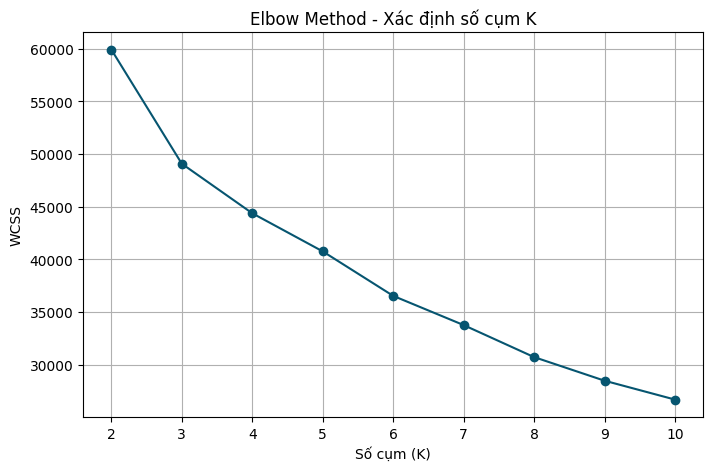

Silhouette Score cho K=4: 0.236


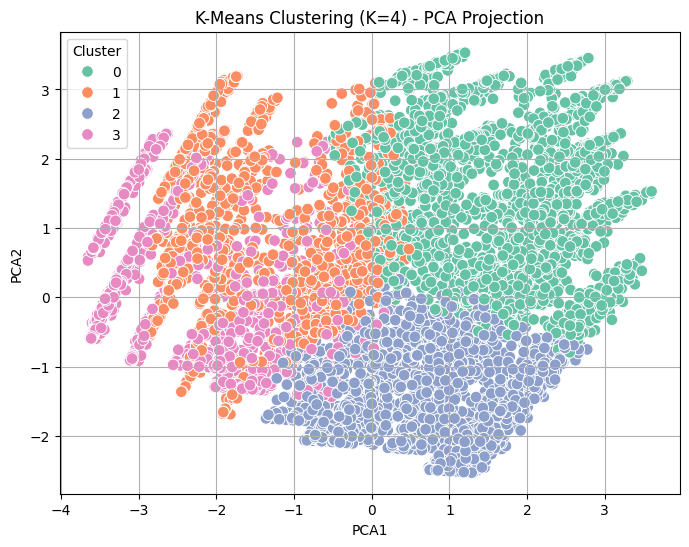

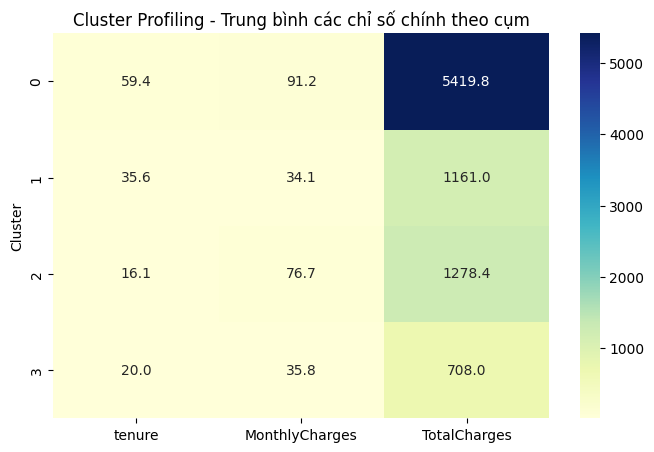

In [ ]:
# 1Ô∏è‚É£ Import th∆∞ vi·ªán
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2Ô∏è‚É£ Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
df_kmeans = df.copy()

# Chuy·ªÉn TotalCharges sang numeric
df_kmeans['TotalCharges'] = pd.to_numeric(df_kmeans['TotalCharges'], errors='coerce')
df_kmeans = df_kmeans.dropna(subset=['TotalCharges'])

# Ch·ªçn c√°c c·ªôt li√™n quan ƒë·∫øn h√†nh vi s·ª≠ d·ª•ng & chi ti√™u
features = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling'
]

X = df_kmeans[features]

# 3Ô∏è‚É£ One-hot encode cho bi·∫øn ph√¢n lo·∫°i
X_encoded = pd.get_dummies(X, drop_first=True)

# 4Ô∏è‚É£ Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5Ô∏è‚É£ D√πng Elbow method ƒë·ªÉ ch·ªçn s·ªë c·ª•m
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', color='#065570')
plt.title("Elbow Method - X√°c ƒë·ªãnh s·ªë c·ª•m K")
plt.xlabel("S·ªë c·ª•m (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# üëâ Sau khi xem bi·ªÉu ƒë·ªì, ch·ªçn K t·ªëi ∆∞u (v√≠ d·ª• K=4)
k_opt = 4

# 6Ô∏è‚É£ Hu·∫•n luy·ªán K-Means
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(X_scaled)

# G√°n nh√£n c·ª•m v√†o DataFrame
df_kmeans['Cluster'] = kmeans.labels_

# 7Ô∏è‚É£ ƒê√°nh gi√° Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score cho K={k_opt}: {score:.3f}")

# 8Ô∏è‚É£ Gi·∫£m chi·ªÅu ƒë·ªÉ tr·ª±c quan h√≥a (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_kmeans['PCA1'] = X_pca[:, 0]
df_kmeans['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_kmeans, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title(f"K-Means Clustering (K={k_opt}) - PCA Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid()
plt.show()

# 9Ô∏è‚É£ H·ªì s∆° ƒë·∫∑c tr∆∞ng t·ª´ng c·ª•m (cluster profiling)
cluster_profile = df_kmeans.groupby('Cluster')[['tenure','MonthlyCharges','TotalCharges']].mean().round(1)
cluster_profile

# 10Ô∏è‚É£ V·∫Ω heatmap ƒë·ªÉ xem s·ª± kh√°c bi·ªát gi·ªØa c√°c c·ª•m
plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Profiling - Trung b√¨nh c√°c ch·ªâ s·ªë ch√≠nh theo c·ª•m")
plt.show()


Cluster 0 :Kh√°ch h√†ng trung th√†nh cao, chi ti√™u cao ‚Üí nh√≥m kh√°ch VIP, d√πng nhi·ªÅu d·ªãch v·ª• l√¢u d√†i
Cluster 1:Kh√°ch h√†ng m·ªõi, chi ti√™u th·∫•p, c√≥ th·ªÉ r·ªùi b·ªè s·ªõm ‚Üí nh√≥m ti·ªÅm nƒÉng c·∫ßn chƒÉm s√≥c.
Cluster 2:Kh√°ch h√†ng m·ªõi, chi ti√™u cao ‚Üí c√≥ th·ªÉ l√† nh√≥m test d·ªãch v·ª•, n√™n t·∫≠p trung gi·ªØ ch√¢n.
Cluster 3: Kh√°ch h√†ng r·ªùi r·∫°c, √≠t chi ti√™u, kh√¥ng g·∫Øn b√≥ l√¢u ‚Üí nh√≥m √≠t gi√° tr·ªã, c√≥ th·ªÉ t·ªëi ∆∞u chi ph√≠ marketing.
